In [1]:
pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats

# Import API key
from config import weatherPy_apiKey

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
print(weatherPy_apiKey)

54f6f5bb1a7c4610462289caa0693a66


In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create an empty list to store JSON responses
response_json = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [5]:
# Build query URL
queryUrl = "http://api.openweathermap.org/data/2.5/weather?" + "appid=" + weatherPy_apiKey + "&q="

In [6]:
# creating dataframe wtih test_cities
test_cities = ['acapulco', 'jamestown', 'dali', 'malatya', 'manila', 'pevek', 'cidreira']
responses = []
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
clouds = []
wind = []

index = 1
for city in cities:
    weather_data = requests.get(queryUrl + city).json()
    responses.append(weather_data)
    try:
        city_name.append(weather_data['name'])
        latitude.append(weather_data['coord']['lat'])
        longitude.append(weather_data['coord']['lon'])
        temperature.append(weather_data['main']['temp'])
        humidity.append(weather_data['main']['humidity'])
        clouds.append(weather_data['clouds']['all'])
        wind.append(weather_data['wind']['speed'])
        print(f'Record {index} | {city} found')
        index += 1
    except:
        print(f'Record {index} | **{city} not found**')
        index += 1
        pass

Record 1 | vaini found
Record 2 | hilo found
Record 3 | mareeba found
Record 4 | **taolanaro not found**
Record 5 | hun found
Record 6 | hay river found
Record 7 | taoudenni found
Record 8 | bluff found
Record 9 | christchurch found
Record 10 | takoradi found
Record 11 | luderitz found
Record 12 | mount gambier found
Record 13 | mataura found
Record 14 | punta arenas found
Record 15 | lagos found
Record 16 | **karamea not found**
Record 17 | saint-philippe found
Record 18 | waipawa found
Record 19 | **barentsburg not found**
Record 20 | jasper found
Record 21 | tiksi found
Record 22 | thompson found
Record 23 | puerto ayora found
Record 24 | **nizhneyansk not found**
Record 25 | hobart found
Record 26 | ponta do sol found
Record 27 | busselton found
Record 28 | yellowknife found
Record 29 | castro found
Record 30 | charleston found
Record 31 | khatanga found
Record 32 | lourdes found
Record 33 | kapaa found
Record 34 | ribeira grande found
Record 35 | butaritari found
Record 36 | soron

Record 287 | coahuayana found
Record 288 | sandnessjoen found
Record 289 | picota found
Record 290 | awbari found
Record 291 | madingou found
Record 292 | **dolbeau not found**
Record 293 | vila franca do campo found
Record 294 | boa vista found
Record 295 | safford found
Record 296 | verkhniy baskunchak found
Record 297 | **yurya not found**
Record 298 | sangar found
Record 299 | nemuro found
Record 300 | bambanglipuro found
Record 301 | saint pete beach found
Record 302 | fortuna found
Record 303 | **macaboboni not found**
Record 304 | **marcona not found**
Record 305 | mahebourg found
Record 306 | sao filipe found
Record 307 | pevek found
Record 308 | orchard homes found
Record 309 | **nguiu not found**
Record 310 | byron bay found
Record 311 | sorbhog found
Record 312 | salvador found
Record 313 | esperance found
Record 314 | naze found
Record 315 | hohhot found
Record 316 | katsuura found
Record 317 | anderson found
Record 318 | geraldton found
Record 319 | karak found
Record 320 

Record 574 | radeberg found
Record 575 | grenville found
Record 576 | asyut found
Record 577 | sao gabriel found
Record 578 | zanjan found
Record 579 | kushiro found
Record 580 | petropavlovsk-kamchatskiy found
Record 581 | baykit found
Record 582 | carbonia found
Record 583 | pemberton found
Record 584 | walvis bay found
Record 585 | itupiranga found
Record 586 | **tubruq not found**
Record 587 | kruisfontein found
Record 588 | alyangula found
Record 589 | kumluca found
Record 590 | mangrol found
Record 591 | wasilla found
Record 592 | jalu found
Record 593 | bilibino found
Record 594 | saurimo found
Record 595 | luganville found
Record 596 | blatna found
Record 597 | luhyny found
Record 598 | alekseyevsk found
Record 599 | lavrentiya found
Record 600 | surin found
Record 601 | ercis found
Record 602 | tanete found
Record 603 | syracuse found
Record 604 | sobolevo found
Record 605 | neiafu found
Record 606 | touba found
Record 607 | trapani found
Record 608 | desna found
Record 609 | 

In [7]:
#print(responses)

In [8]:
weather_df = pd.DataFrame({
    'City': city_name,
    'Lat': latitude,
    'Lng': longitude,
    'Temperature': temperature,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind (MPH)': wind
})

weather_df

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Vaini,-21.2000,-175.2000,292.15,100,20,1.03
1,Hilo,19.7297,-155.0900,292.33,68,75,3.60
2,Mareeba,-17.0000,145.4333,297.33,83,90,2.57
3,Hūn,29.1268,15.9477,298.75,24,68,6.05
4,Hay River,60.8156,-115.7999,266.16,86,100,3.60
...,...,...,...,...,...,...,...
562,Desna,50.9273,30.7605,274.07,100,100,2.00
563,São Raimundo Nonato,-9.0153,-42.6994,308.94,25,65,4.47
564,Aberdeen,57.1437,-2.0981,276.56,60,40,3.09
565,City of San Pedro,14.3500,121.0167,300.44,74,75,2.06


In [9]:
# function to convert 'Temperature' column from Kelvin to Farenheit
def Kelvin_to_Farenheit(kelvin):
    farenheit = (kelvin-273.15)*(9/5)+32
    return farenheit

In [10]:
weather_df['Temperature'] = Kelvin_to_Farenheit(weather_df['Temperature'])
weather_df

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Vaini,-21.2000,-175.2000,66.200,100,20,1.03
1,Hilo,19.7297,-155.0900,66.524,68,75,3.60
2,Mareeba,-17.0000,145.4333,75.524,83,90,2.57
3,Hūn,29.1268,15.9477,78.080,24,68,6.05
4,Hay River,60.8156,-115.7999,19.418,86,100,3.60
...,...,...,...,...,...,...,...
562,Desna,50.9273,30.7605,33.656,100,100,2.00
563,São Raimundo Nonato,-9.0153,-42.6994,96.422,25,65,4.47
564,Aberdeen,57.1437,-2.0981,38.138,60,40,3.09
565,City of San Pedro,14.3500,121.0167,81.122,74,75,2.06


In [11]:
weather_df.dtypes

City            object
Lat            float64
Lng            float64
Temperature    float64
Humidity         int64
Cloudiness       int64
Wind (MPH)     float64
dtype: object

##### Analysis of 'Temperature (Farenheit) v. Latitude'

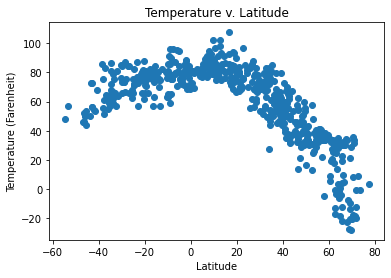

In [12]:
# Scatter Plot - Temperature (Farenheit) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
plt.savefig(f'visualizations/TempLat.png')
plt.show()

##### Analysis of 'Humidity (%) v. Latitude'


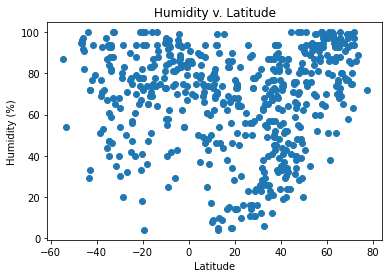

In [13]:
# Scatter Plot - Humidity (%) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(f'visualizations/HumLat.png')
plt.show()

##### Analysis of 'Cloudiness(%) v. Latitude'


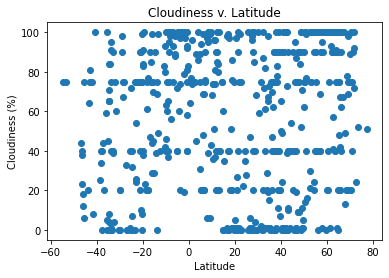

In [14]:
# Scatter Plot - Cloudiness (%) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(f'visualizations/CloudLat.png')
plt.show()

##### Analysis of  'Wind Speed (mph) v. Latitude'


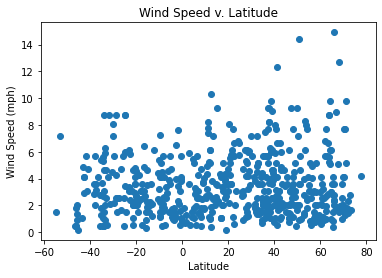

In [15]:
# Scatter Plot - Wind Speed (mph)) v. Latitude
x_values = weather_df['Lat']
y_values = weather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed v. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig(f'visualizations/WindLat.png')
plt.show()

### Linear Regressions: Northern Hemisphere v. Southern Hemisphere

In [16]:
# Northern Hemisphere Data Frame
northWeather_df = weather_df.loc[(
    weather_df['Lat'] >= 0)]
northWeather_df

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
1,Hilo,19.7297,-155.0900,66.524,68,75,3.60
3,Hūn,29.1268,15.9477,78.080,24,68,6.05
4,Hay River,60.8156,-115.7999,19.418,86,100,3.60
5,Taoudenni,22.6783,-3.9836,96.638,10,0,6.67
8,Takoradze,4.8845,-1.7554,82.976,78,31,5.45
...,...,...,...,...,...,...,...
561,Province of Trapani,37.8333,12.6667,52.754,72,40,9.26
562,Desna,50.9273,30.7605,33.656,100,100,2.00
564,Aberdeen,57.1437,-2.0981,38.138,60,40,3.09
565,City of San Pedro,14.3500,121.0167,81.122,74,75,2.06


In [17]:
# Southern Hemisphere Data Frame
southWeather_df = weather_df.loc[(
    weather_df['Lat'] < 0)]
southWeather_df

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind (MPH)
0,Vaini,-21.2000,-175.2000,66.200,100,20,1.03
2,Mareeba,-17.0000,145.4333,75.524,83,90,2.57
6,Bluff,-46.6000,168.3333,46.004,95,44,0.45
7,Christchurch,-43.5333,172.6333,50.090,100,20,1.03
9,Lüderitz,-26.6481,15.1594,65.714,71,0,4.73
...,...,...,...,...,...,...,...
548,Saurimo,-9.6608,20.3916,65.066,97,100,1.10
549,Luganville,-15.5333,167.1667,77.396,87,45,2.22
556,Tanete,-3.9443,119.7848,76.928,87,97,1.22
559,Neiafu,-18.6500,-173.9833,66.200,94,20,4.26


#### Temperature (Farenheit) Linear Regressions

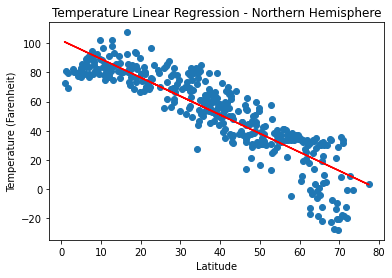

The r-value is: 0.7767539936120007


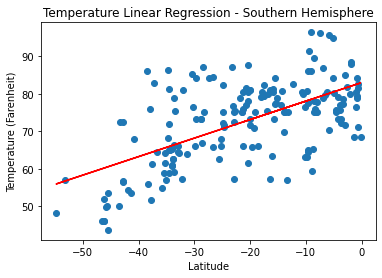

The r-value is: 0.3762784764445052


In [18]:
# Linear Regression - Temperature (Farenheit) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/TempLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Temperature (Farenheit) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Temperature']
plt.scatter(x_values, y_values)
plt.title('Temperature Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Temperature (Farenheit)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/TempLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Humidity (%) Linear Regressions

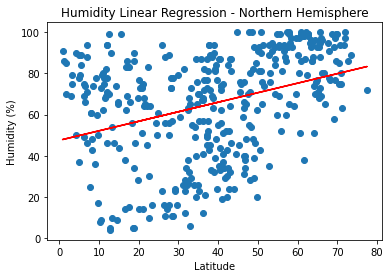

The r-value is: 0.12152491616281377


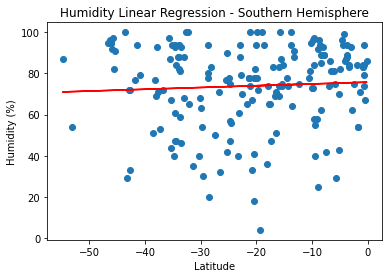

The r-value is: 0.0034310616414514527


In [19]:
# Linear Regression - Humidity (%) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/HumLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Humidity (%) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Humidity']
plt.scatter(x_values, y_values)
plt.title('Humidity Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/HumLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Cloudiness (%) Linear Regression

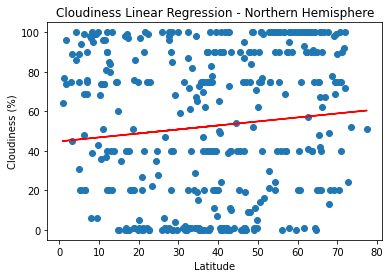

The r-value is: 0.010880646691827965


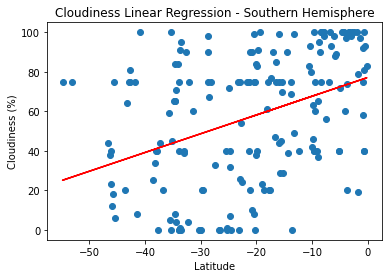

The r-value is: 0.15139785043468804


In [20]:
# Linear Regression - Cloudiness (%) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/CloudLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Cloudiness (%) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Cloudiness']
plt.scatter(x_values, y_values)
plt.title('Cloudiness Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/CloudLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Wind Speed (mph) Linear Regressions

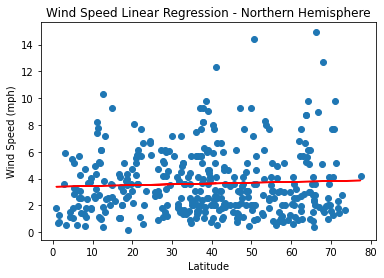

The r-value is: 0.0023257656485563614


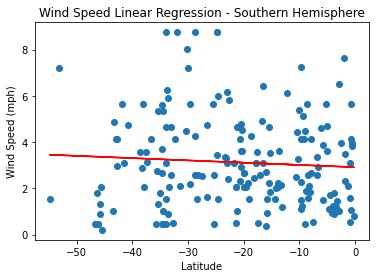

The r-value is: 0.004491382526874497


In [21]:
# Linear Regression - Wind Speed (mph) v. Latitude (Northern Hemisphere)
x_values = northWeather_df['Lat']
y_values = northWeather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed Linear Regression - Northern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/WindLinreg_North.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Linear Regression - Wind Speed (mph) v. Latitude (Southern Hemisphere)
x_values = southWeather_df['Lat']
y_values = southWeather_df['Wind (MPH)']
plt.scatter(x_values, y_values)
plt.title('Wind Speed Linear Regression - Southern Hemisphere')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
plt.savefig(f'visualizations/WindLinreg_South.png')
plt.show()
print(f"The r-value is: {rvalue**2}")

#### Save Data Frames as CSVs

In [22]:
# Weather Data Frame
weather_df_csv = weather_df.to_csv(index=False)
weatherData_csv = open("data/weather_df.csv", "w", encoding='utf-8')
weatherData_csv.write(weather_df_csv)
weatherData_csv.close()

In [23]:
# Northern Hemisphere - Weather Data Frame
northWeather_df_csv = northWeather_df.to_csv(index=False)
northWeatherData_csv = open("data/northWeather_df.csv", "w", encoding='utf-8')
northWeatherData_csv.write(northWeather_df_csv)
northWeatherData_csv.close()

In [24]:
# Southern Hemisphere - Weather Data Frame
southWeather_df_csv = southWeather_df.to_csv(index=False)
southWeatherData_csv = open("data/southWeather_df.csv", "w", encoding='utf-8')
southWeatherData_csv.write(southWeather_df_csv)
southWeatherData_csv.close()